In [1]:
from discopy import *

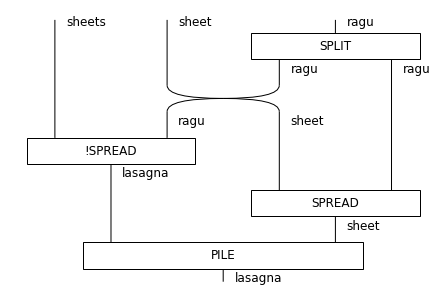

In [2]:
sheet, ragu, lasagna, bang_sheet = Ty('sheet'), Ty('ragu'), Ty('lasagna'), Ty('sheets')

spread = Box('SPREAD', sheet @ ragu, sheet)
bang_spread = Box('!SPREAD', bang_sheet @ ragu, lasagna)
split = Box('SPLIT', ragu, ragu @ ragu)
swap = Box('SWAP', sheet @ ragu, ragu @ sheet)
pile = Box('PILE', lasagna @ sheet, lasagna)

diagram = Id(bang_sheet @ sheet) @ split >> Id(bang_sheet) @ swap @ Id(ragu) >> bang_spread @ spread >> pile
diagram.draw(aspect='auto')

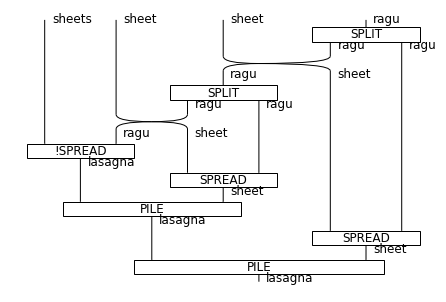

In [5]:
ob = {ragu: ragu, bang_sheet: bang_sheet @ sheet, sheet: sheet, lasagna: lasagna}
ar = {spread: spread, bang_spread: diagram, split: split, swap: swap, pile: pile}
Next = Functor(ob, ar)
Next(Next(bang_spread)).draw(aspect='auto')